<b> Importing Libraries <b>

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<b> Uploading Dataset <b>

In [88]:
df =pd.read_csv('US_Accidents_March23.csv')

<b> Data Cleaning <b>

In [90]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [92]:
df.shape

(7728394, 46)

In [93]:
df.dropna(inplace = True)

In [94]:
df.isna().sum()/len(df)*100

ID                       0.0
Source                   0.0
Severity                 0.0
Start_Time               0.0
End_Time                 0.0
Start_Lat                0.0
Start_Lng                0.0
End_Lat                  0.0
End_Lng                  0.0
Distance(mi)             0.0
Description              0.0
Street                   0.0
City                     0.0
County                   0.0
State                    0.0
Zipcode                  0.0
Country                  0.0
Timezone                 0.0
Airport_Code             0.0
Weather_Timestamp        0.0
Temperature(F)           0.0
Wind_Chill(F)            0.0
Humidity(%)              0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Precipitation(in)        0.0
Weather_Condition        0.0
Amenity                  0.0
Bump                     0.0
Crossing                 0.0
Give_Way                 0.0
Junction                 0.0
No_Exit       

In [95]:
df.drop(['Description','Zipcode','Weather_Timestamp'],axis=1,inplace=True)

In [96]:
df.drop(['Precipitation(in)'],axis =1 , inplace = True) 

In [97]:
df.drop(['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Astronomical_Twilight','Nautical_Twilight','Civil_Twilight'], axis = 1, inplace = True)

In [98]:
df.drop(['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng'],axis =1 ,inplace= True)

In [99]:
df.drop(['Country','Airport_Code'], axis =1 , inplace = True)

In [100]:
df.shape

(3554549, 26)

In [101]:
df.dtypes.value_counts()

bool       13
object     11
int64       1
float64     1
Name: count, dtype: int64

In [102]:
df.reset_index(drop=True, inplace=True)

In [103]:
df

,ID,Source,Severity,Start_Time,End_Time,Distance(mi),Street,City,County,State,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-3412645,Source1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,3.230,Outerbelt E,Dublin,Franklin,OH,...,False,False,False,False,False,False,False,False,False,Night
1,A-3412650,Source1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,0.500,I-75 S,Cincinnati,Hamilton,OH,...,False,False,False,False,False,False,False,False,False,Day
2,A-3412654,Source1,2,2016-02-08 11:51:46,2016-02-08 17:51:46,0.521,I-71 S,Cleveland,Cuyahoga,OH,...,True,False,False,False,False,False,False,False,False,Day
3,A-3412656,Source1,2,2016-02-08 15:16:43,2016-02-08 21:16:43,0.826,Outerbelt W,Westerville,Franklin,OH,...,False,False,False,False,False,False,False,False,False,Day
4,A-3412657,Source1,2,2016-02-08 15:43:50,2016-02-08 21:43:50,0.307,I-75 N,Cincinnati,Hamilton,OH,...,False,False,False,False,False,False,False,False,False,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554544,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,0.543,Pomona Fwy E,Riverside,Riverside,CA,...,False,False,False,False,False,False,False,False,False,Day
3554545,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,0.338,I-8 W,San Diego,San Diego,CA,...,False,False,False,False,False,False,False,False,False,Day
3554546,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,0.561,Garden Grove Fwy,Orange,Orange,CA,...,True,False,False,False,False,False,False,False,False,Day
3554547,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,0.772,San Diego Fwy S,Culver City,Los Angeles,CA,...,False,False,False,False,False,False,False,False,False,Day


<b> Feature Engineering <b>

In [105]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

In [106]:
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day

In [107]:
df['Year'].unique()

array([2016, 2017, 2023, 2021, 2022, 2020, 2018, 2019])

In [108]:
df['Month'].unique()

array([ 2,  3,  4,  5,  6, 11, 12,  1, 10,  9,  8,  7])

In [109]:
df['Day'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 24, 25,  1,  2,  3,  4,  5,
       22, 18, 20,  6, 23, 28, 29, 30, 31,  7, 19, 26, 27, 21])

In [110]:
df.drop(['Start_Time','End_Time'],axis =1 , inplace = True) 

In [111]:
df

,ID,Source,Severity,Distance(mi),Street,City,County,State,Timezone,Weather_Condition,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Year,Month,Day
0,A-3412645,Source1,3,3.230,Outerbelt E,Dublin,Franklin,OH,US/Eastern,Light Rain,...,False,False,False,False,False,False,Night,2016,2,8
1,A-3412650,Source1,3,0.500,I-75 S,Cincinnati,Hamilton,OH,US/Eastern,Light Rain,...,False,False,False,False,False,False,Day,2016,2,8
2,A-3412654,Source1,2,0.521,I-71 S,Cleveland,Cuyahoga,OH,US/Eastern,Snow,...,False,False,False,False,False,False,Day,2016,2,8
3,A-3412656,Source1,2,0.826,Outerbelt W,Westerville,Franklin,OH,US/Eastern,Snow,...,False,False,False,False,False,False,Day,2016,2,8
4,A-3412657,Source1,2,0.307,I-75 N,Cincinnati,Hamilton,OH,US/Eastern,Light Snow,...,False,False,False,False,False,False,Day,2016,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554544,A-7777757,Source1,2,0.543,Pomona Fwy E,Riverside,Riverside,CA,US/Pacific,Fair,...,False,False,False,False,False,False,Day,2019,8,23
3554545,A-7777758,Source1,2,0.338,I-8 W,San Diego,San Diego,CA,US/Pacific,Fair,...,False,False,False,False,False,False,Day,2019,8,23
3554546,A-7777759,Source1,2,0.561,Garden Grove Fwy,Orange,Orange,CA,US/Pacific,Partly Cloudy,...,False,False,False,False,False,False,Day,2019,8,23
3554547,A-7777760,Source1,2,0.772,San Diego Fwy S,Culver City,Los Angeles,CA,US/Pacific,Fair,...,False,False,False,False,False,False,Day,2019,8,23


In [112]:
df.shape

(3554549, 27)

<b> Data Visualization <b>

In [114]:
df.columns

Index(['ID', 'Source', 'Severity', 'Distance(mi)', 'Street', 'City', 'County',
       'State', 'Timezone', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Year', 'Month', 'Day'],
      dtype='object')

In [115]:
df['Junction'].unique()

array([False,  True])

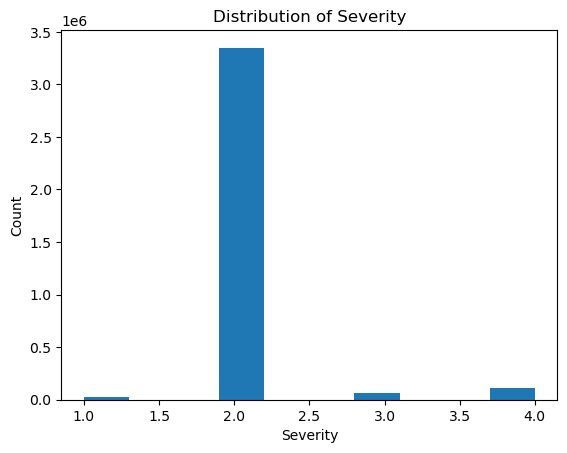

In [116]:
# 1. Histogram of Severity
plt.hist(df['Severity'])
plt.title('Distribution of Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

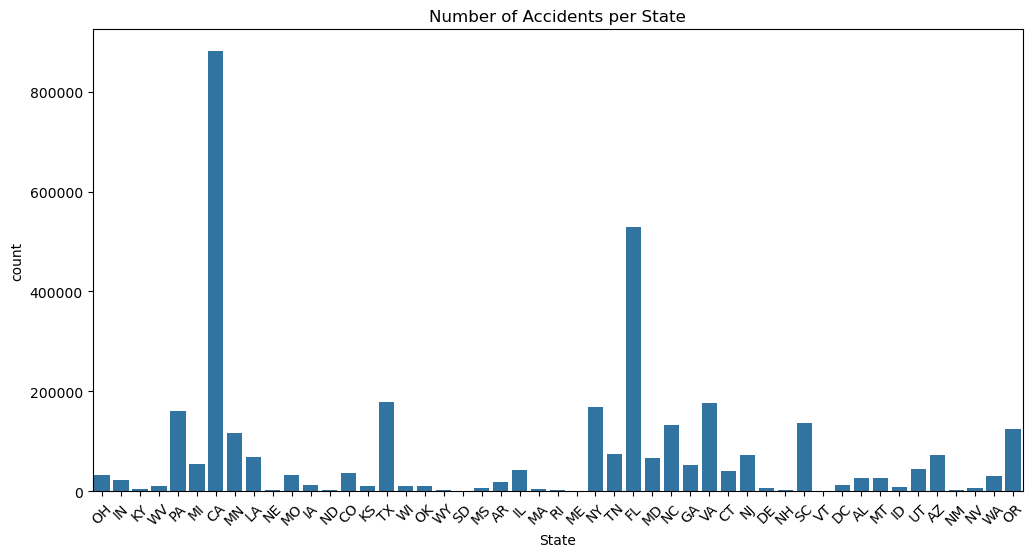

In [117]:
# 2. Bar Chart of States
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=df)
plt.title('Number of Accidents per State')
plt.xticks(rotation=45)
plt.show()

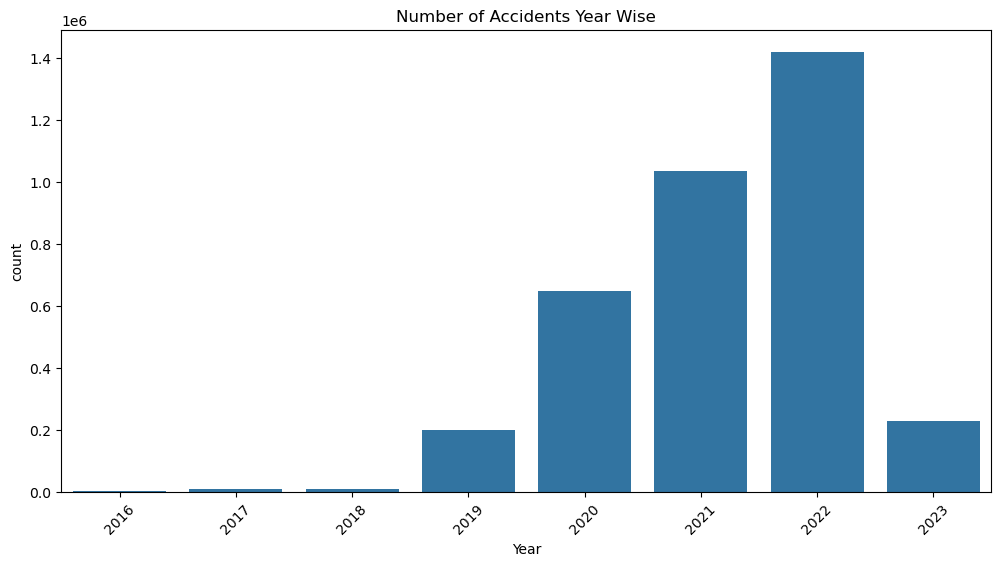

In [118]:
# 3. Bar Chart of Year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df)
plt.title('Number of Accidents Year Wise')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

In [119]:
df.columns

Index(['ID', 'Source', 'Severity', 'Distance(mi)', 'Street', 'City', 'County',
       'State', 'Timezone', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Year', 'Month', 'Day'],
      dtype='object')

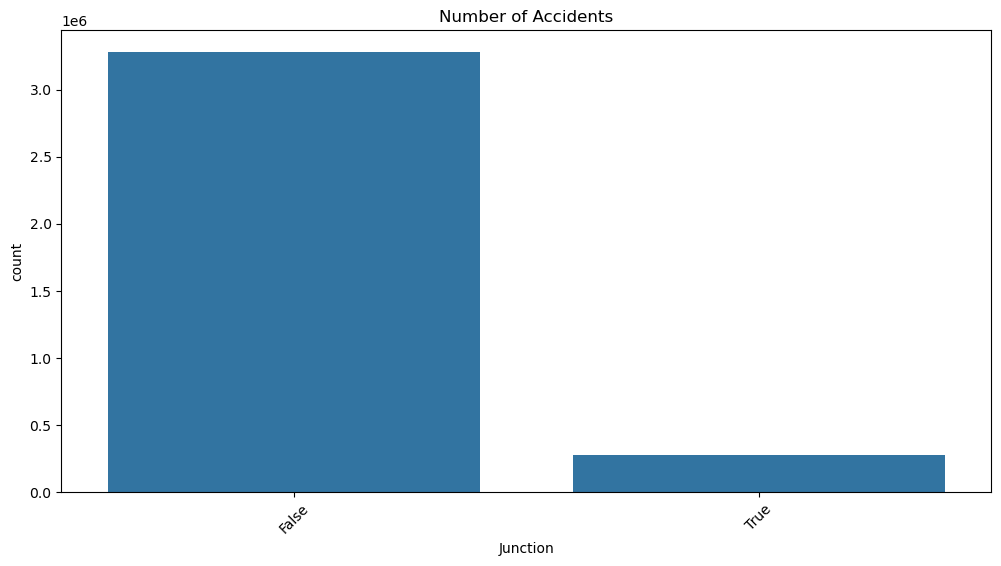

In [120]:
# 4. Bar Chart of Junction
plt.figure(figsize=(12, 6))
sns.countplot(x='Junction', data=df)
plt.title('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

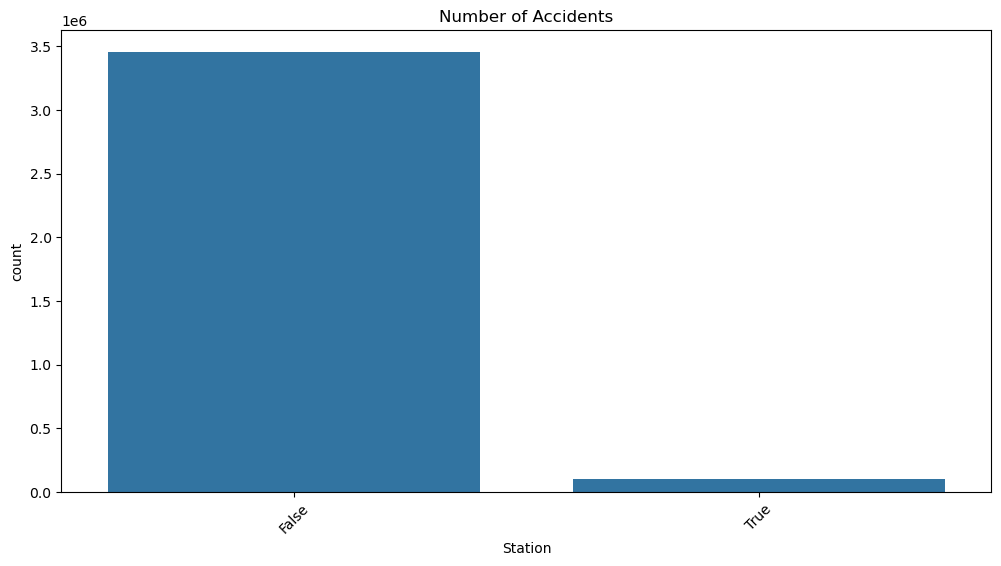

In [121]:
# 5. Bar Chart of Station
plt.figure(figsize=(12, 6))
sns.countplot(x='Station', data=df)
plt.title('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

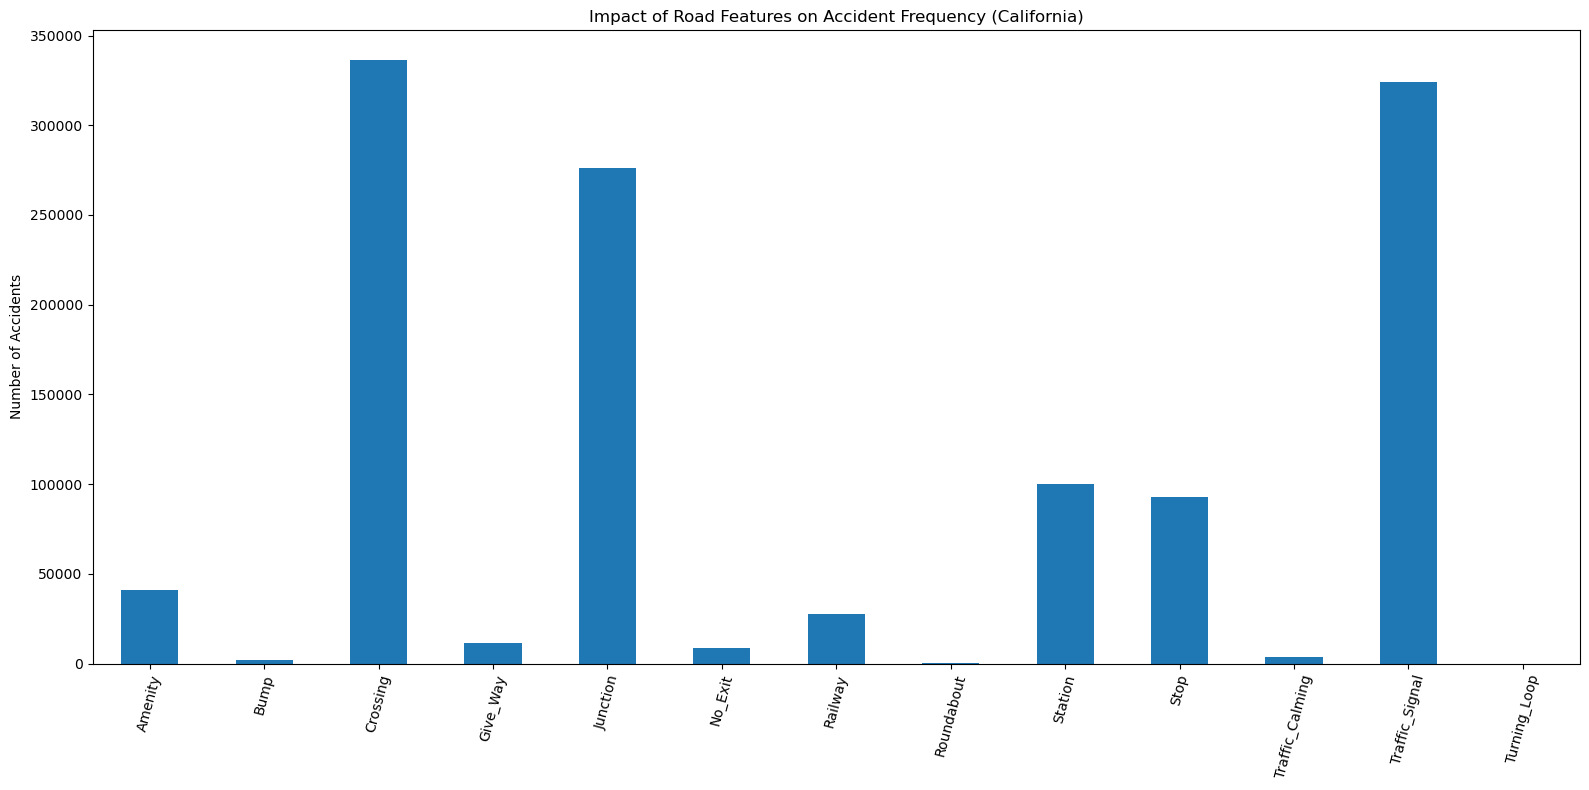

In [122]:
road_features = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
feature_impact = df[road_features].sum()
plt.figure(figsize=(16, 8))
feature_impact.plot(kind='bar')
plt.title('Impact of Road Features on Accident Frequency (California)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

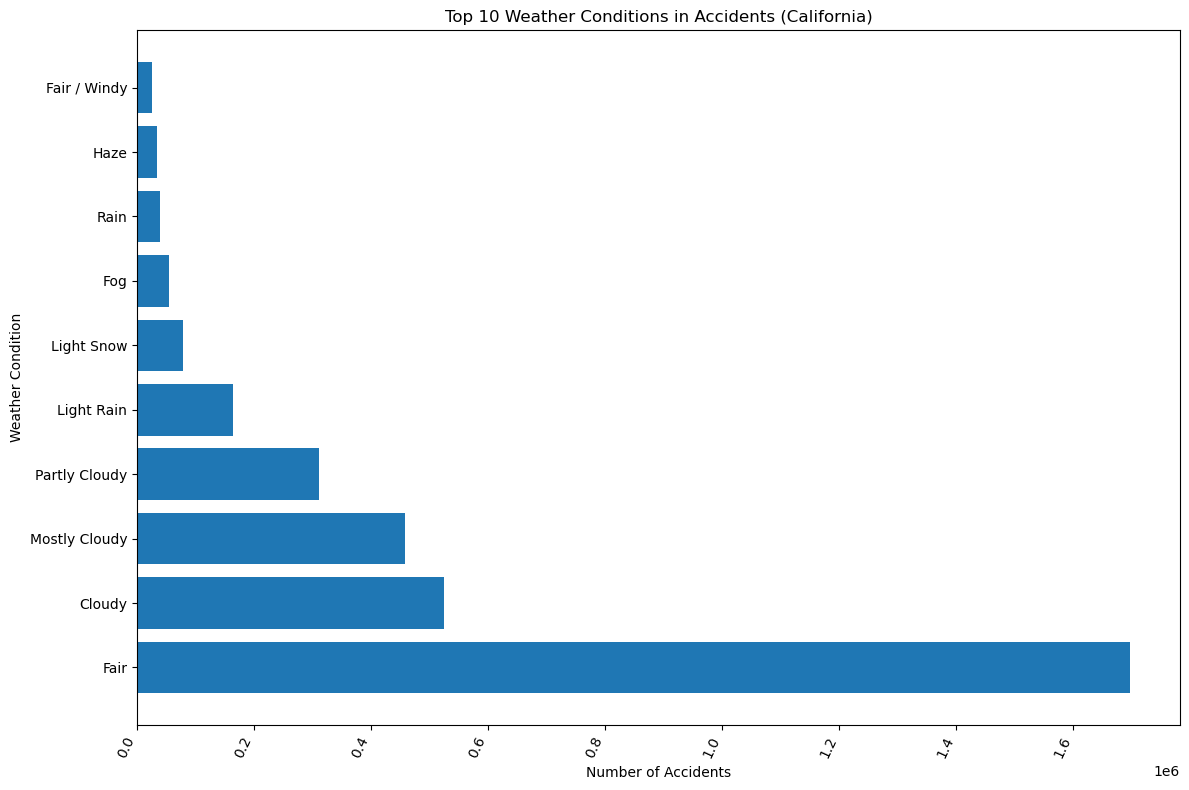

In [136]:
top_10_weather = df['Weather_Condition'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
plt.barh(y=top_10_weather.index, width=top_10_weather.values)
plt.title('Top 10 Weather Conditions in Accidents (California)')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.xticks(rotation=65, ha='right')
plt.tight_layout()
plt.show()